Pontificia Universidad Católica de Chile\
Facultad de Ingeniería\
IIC2613 - Inteligencia Artificial\
2024-2

---

<div style="text-align: center;">
  <h2>Tarea 4</h2>
  <h1>Aprendizaje de Máquina</h1>
  <h2>DCChampiñones</h2>
  <p>Fecha de entrega: martes 5 de noviembre a las 23:59 hrs.
</div>

---

<div style="text-align: center;">
  <h3>Nombre: Vicente Antonio Lavagnino Gatica</h3>
  <h3>Número de alumno: 21638322</h3>
</div>

---

### Librerías a utilizar

In [2]:
'''
pd (pandas)
Documentación disponible en: https://pandas.pydata.org/docs/reference/index.html#api
'''
import pandas as pd # Manejo del dataset

# -----------------------------------------------------------------------------------------------

'''
np (numpy)
Documentación disponible en: https://numpy.org/doc/2.1/reference/index.html#reference
'''
import numpy as np # Manejo del dataset

# -----------------------------------------------------------------------------------------------

'''
sklearn (scikit-learn)
Documentación disponible en: https://scikit-learn.org/dev/api/index.html
'''
from sklearn.model_selection import train_test_split # Separación del dataset en 'train' y 'test'
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Preprocesamiento del dataset
from sklearn.neighbors import KNeighborsClassifier # Clasificador KNN
from sklearn import tree # Clasificador Decision Tree
from sklearn.ensemble import RandomForestClassifier # Clasificador Random Forest
from sklearn.svm import SVC # Clasificador SVM
from sklearn.metrics import classification_report, confusion_matrix # Métricas de evaluación

# -----------------------------------------------------------------------------------------------

'''
plt (matplotlib)
Documentación disponible en: https://matplotlib.org/stable/api/index.html
'''
from matplotlib import pyplot as plt # Gráficos

# -----------------------------------------------------------------------------------------------

'''
sns (seaborn)
Documentación disponible en: https://seaborn.pydata.org/api.html
'''
import seaborn as sns # Gráficos

**IMPORTANTE**: estas son las librerías permitidas para esta parte de la Tarea 4. El uso de cualquier otra librería debe ser debidamente justificado, y *puede no ser aceptado por el cuerpo docente del curso*.

---
---

<div style="text-align: center;">
  <h2>Actividades a realizar</h2>
</div>

---
---

<div style="text-align: center;">
  <h3>Preprocesamiento del dataset</h3>
</div>

---

Lee la información contenida en el archivo **mushroom.csv**. Una vez que la información esté cargada, comenta sobre los elementos que contiene y su naturaleza. Para esto, responde al menos a estas preguntas: ¿Cuántos datos hay? ¿Cuántos atrbiutos hay y cuáles son? ¿A qué tipo de dato corresponde cada atributo? ¿Cuál es la columna que queremos predecir? ¿Cómo se ve la distribución de las clases a predecir? Para entenderlos de mejor manera, es muy útil visualizar los datos con gráficos. Para esto te pediremos que hagas al menos un gráfico para la distribución de las clases.

In [3]:
# Abrimos el dataset
data = pd.read_csv('mushroom.csv')
# Mostramos las primeras 5 filas
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


El dataset tiene 54035 filas y 9 columnas
El dataset tiene 9 atributos, los cuales son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB

Distribución de las clases:
class
1    29675
0    24360
Name: count, dtype: int64


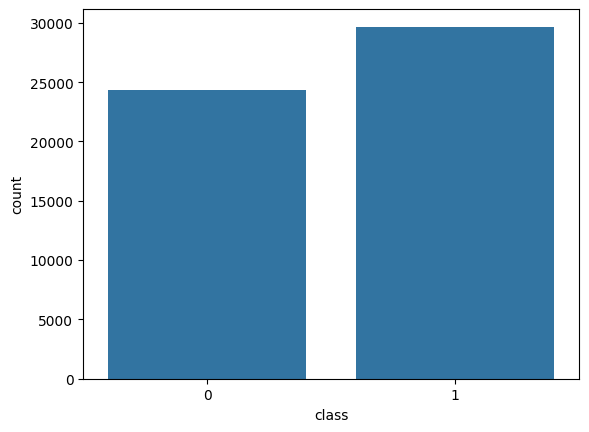

In [4]:
# Cuántas filas y columnas tiene el dataset
print(f"El dataset tiene {data.shape[0]} filas y {data.shape[1]} columnas")

# Cuantos atributos hay y cuales son y que tipo de dato tienen
print(f"El dataset tiene {data.shape[1]} atributos, los cuales son:")
data.info()

# Distribución de las clases
print("\nDistribución de las clases:")
print(data['class'].value_counts())

#grafico
sns.countplot(x='class', data=data)
plt.show()

**RESPUESTA**: 

En este data set, encontramos un total de **54,035 filas** y **9 columnas**. Las columnas incluidas y el tipo de datos son los siguientes:

- `cap-diameter` - `int64`
- `cap-shape` - `int64`
- `gill-attachment` - `int64`
- `gill-color` - `int64`
- `stem-height` - `float64`
- `stem-width` - `int64`
- `stem-color` - `int64`
- `season` - `float64`
- `class` - `int64`

La columna que queremos predecir es la **`class`**.

La distribución de las clases para predecir se muestra a continuación:

- `class = 1` : 29,675 registros
- `class = 0` : 24,360 registros

De manera gráfica podemos ver esta distribución en el gráfico ejecutado previamente.


---

A continuación debes dividir el dataset en conjuntos de entrenamiento y prueba. Justifica tu elección de las proporciones.

**RESPUESTA**: El conjunto de datos se dividió en 2 grupos, donde l 80% de los datos se utilizaron para entrenamiento y el 20% restante para pruebas. Esta división se realizó con el fin de tener un conjunto de datos de entrenamiento lo suficientemente grande para que el modelo pueda aprender de manera adecuada, y un conjunto de datos de prueba lo suficientemente grande para evaluar el rendimiento del modelo.

Respecto al fundamento de esta división, se puede decir que el 80% de los datos de entrenamiento es un porcentaje comúnmente utilizado en la literatura para este tipo de problemas, y el 20% restante es un porcentaje comúnmente utilizado para el conjunto de datos de prueba.

En particular se hizo referencia al siguiente artículo de las justificación: https://codificandobits.com/tutorial/como-combatir-el-overfitting/

In [33]:
# Código inspirado en Tetik, M. E. (n.d.). Mushroom with Random Forest Classification Model [Notebook]. Kaggle. https://www.kaggle.com/code/muhammedenestetik/mushroom-with-random-forest-classification-model/notebook

# Dividimos el dataset en 'train' y 'test'
X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

Luego debes identificar datos faltantes o anómalos y decidir que hacer con ellos. Asimismo, responde a la pregunta: ¿Son todos los atributos útiles para esta tarea? Justifica, y decide que hacer con ellos. Recuerda que puedes normalizar o estandarizar las características según sea necesario.

**RESPUESTA**: Al ejecutar el código vemos que no hay datos faltantes en el dataset. Además de que los datos no presentan anomalías.

In [18]:
# Datos faltantes
to_fix_data = data.isnull().sum()
print(to_fix_data) # No hay datos faltantes

# Ver datos anomalos
for column in data.columns:
    print(f"{column}: {data[column].unique()}")

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64
cap-diameter: [1372 1461 1371 ... 1847 1851 1885]
cap-shape: [2 6 4 0 1 5 3]
gill-attachment: [2 0 1 5 6 4 3]
gill-color: [10  5  7  9  0  3 11  8  1  6  4  2]
stem-height: [3.80746675 3.61249629 3.78757181 ... 1.95808827 1.98196221 2.01379412]
stem-width: [1545 1557 1566 ... 3271 2738 2995]
stem-color: [11 12  6 10  0  5  9  8  1  4  3  7  2]
season: [1.80427271 0.94319455 0.88845029 0.02737213]
class: [1 0]


---

Para terminar el preprocesamiento, debes convertir variables categóricas a numéricas. Primero responde a la siguiente pregunta: ¿Por qué queremos hacer esta conversión? ¿Cuáles son las columnas que debemos convertir? Luego, decide que método utilizaras para cada una y justifica.

**RESPUESTA**: Convertir variables categóricas a numéricas es necesario para que los algoritmos de aprendizaje automático puedan trabajar con ellas, esto debido a que en términos de efiencia y simplicidad, los algoritmos de aprendizaje automático trabajan mejor con datos numéricos. 

Para convertir las variables se utilizará el método de `OneHotEncoder` para las columnas del tipo `object`, sin emargo si vemos el tipo de datos de las columnas, todas son de tipo `int64` o `float64`, por lo que no es necesario realizar esta conversión.

De esta forma haremos el código de manera general por si es necesario en el futuro agregar columnas de tipo `object`, sin embargo, no se realizará ninguna conversión en este caso.

Lo anterior se confirma al revisar la fuente de los datos donde se menciona "This dataset is a cleaned version of the original Mushroom Dataset for Binary Classification Available at UCI Library. This dataset was cleaned using various techniques such as Modal imputation, one-hot encoding, z-score normalization, and feature selection. It contains 9 columns" (https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset/data)

In [ ]:
# Preprocesamiento de variables categóricas

# OneHotEncoder
categorical_cols = data.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    for col in categorical_cols:
        encoder = OneHotEncoder()
        encoded_data = encoder.fit_transform(data[categorical_cols])
        encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
        data = pd.concat([data.drop(columns=categorical_cols), encoded_df], axis=1)

# Visualizamos el dataset
print(data.head())

---

<div style="text-align: center;">
  <h3>Implementación de algoritmos de machine learning</h3>
</div>

---

A continuación debes elegir al menos tres algoritmos de aprendizaje de máquinas vistos en clases y entrenar dichos modelos para resolver esta tarea. Recuerda que cada uno de estos algoritmos tiene sus respectivos
hiperparámetros, por lo que debes seleccionar un conjunto de ellos para cada uno y justificar debidamente la elección

**RESPUESTA**: Vemos que según las importaciones planteadas al inicio del documento, podemos utilizar los siguientes algoritmos:
- `from sklearn.neighbors import KNeighborsClassifier # Clasificador KNN`
- `from sklearn import tree # Clasificador Decision Tree`
- `from sklearn.ensemble import RandomForestClassifier # Clasificador Random Forest`
- `from sklearn.svm import SVC # Clasificador SVM`

Por lo que para este caso usaremos los siguientes algoritmos:
- Decision Tree
- Random Forest
- KNeighborsClassifier


**Primer modelo escogido**: El primer modelo elegido corresponde a un arbol de decisión. Se escogió este modelo debido a que es un modelo simple y fácil de interpretar, de esta forma podemos identificar de una primera aproximación cuales son las variables que toman mayor relevancia. 
Los hiperparámetros seleccionados para este modelo son los siguientes:
- max_depth = 5
- criterion = 'gini'

La información de hiperparámetros se obtuvo de la documentación de sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

En cuanto a los valores seleccionados, el `max_depth` se seleccionó en 5 para evitar el sobreajuste del modelo, y el `criterion` se seleccionó en 'gini' ya que es el valor por defecto.

In [ ]:
tree_model = tree.DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42)
tree_model.fit(X_train, y_train)

Matriz de confusión:
[[3577 1332]
 [1877 4021]]


**Segundo modelo escogido**: El segundo modelo elegido corresponde a un Random Forest. Se escogió este modelo debido a que es un modelo que combina múltiples árboles de decisión, lo que permite mejorar la precisión y evitar el sobreajuste del modelo anterior, de esta forma podemos hacer una comparación directa entre un árbol de decisión y un muchos árboles de decisión aplicados en un Random Forest.

Los hiperparámetros seleccionados para este modelo son los siguientes:
- n_estimators = 100
- max_depth = 5
- criterion = 'gini'

La información de hiperparámetros se obtuvo de la documentación de sklearn: https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html

En cuanto a los valores seleccionados, el `n_estimators` se seleccionó en 100 para tener un número suficiente de árboles en el bosque, el `max_depth` y el `criterion` se seleccionaron en los mismos valores que el árbol de decisión anterior para poder hacer una comparación directa.

In [25]:
rforest_model = RandomForestClassifier(n_estimators=100, max_depth=5, criterion='gini', random_state=42)
rforest_model.fit(X_train, y_train)

# Predicciones
y_pred = rforest_model.predict(X_test)

**Tercer modelo escogido**: El tercer modelo elegido corresponde a un KNeighborsClassifier. Se escogió este modelo debido a que es un modelo simple y matemáticamente mucho más sencillo que el SVM, de esta forma podemos ejemplificar un modelo de clasificación que no es un árbol de decisión.

Los hiperparámetros seleccionados para este modelo son los siguientes:
- n_neighbors = 5
- weights = 'uniform'

La información de hiperparámetros se obtuvo de la documentación de sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

En cuanto a los valores seleccionados, el `n_neighbors` se seleccionó en 5 para tener un número suficiente de vecinos, y el `weights` se seleccionó en 'uniform' ya que es el valor por defecto.

In [28]:
kkn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
kkn_model.fit(X_train, y_train)

KNeighborsClassifier()

---
---

<div style="text-align: center;">
  <h3>Evaluación de Modelos</h3>
</div>

---

A continuación debes evaluar los modelos entrenados en la sección anterior. Para esto debes utilizar las
siguientes métricas (se recomienda utilizar las métricas ya implementadas en las librerías):
- *Accuracy*
- *Precision*
- *Recall*
- *F1-score*


Explica brevemente que indica cada una de estas métricas en general. Luego, calcula estas métricas y muestra la matriz de confusión para cada modelo.

**RESPUESTA**: En particular cada una de las métricas mencionadas se definen de la siguiente manera:
- *Accuracy*: Es la proporción de predicciones correctas sobre el total de predicciones realizadas.
- *Precision*: Es la proporción de predicciones correctas de la clase positiva sobre el total de predicciones de la clase positiva.
- *Recall*: Es la proporción de predicciones correctas de la clase positiva sobre el total de instancias que realmente son de la clase positiva.
- *F1-score*: Es la media armónica entre precision y recall, es decir, es una medida que combina ambas métricas.

**Evaluación primer modelo escogido**: Decision Tree

Accuracy: 0.7030628296474507
              precision    recall  f1-score   support

           0       0.66      0.73      0.69      4909
           1       0.75      0.68      0.71      5898

    accuracy                           0.70     10807
   macro avg       0.70      0.71      0.70     10807
weighted avg       0.71      0.70      0.70     10807



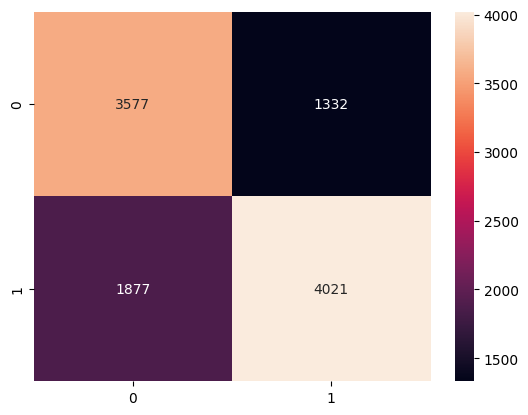

In [41]:
# Predicciones
y_pred = tree_model.predict(X_test)

# Accuracy
print(f"Accuracy: {tree_model.score(X_test, y_test)}")

# Precision, Recall, F1-Score
print(classification_report(y_test, y_pred))

# Matriz de confusión
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d')
plt.show()

**Evaluación segundo modelo escogido**: Random Forest

Accuracy: 0.8081798834089017
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      4909
           1       0.82      0.83      0.83      5898

    accuracy                           0.81     10807
   macro avg       0.81      0.81      0.81     10807
weighted avg       0.81      0.81      0.81     10807



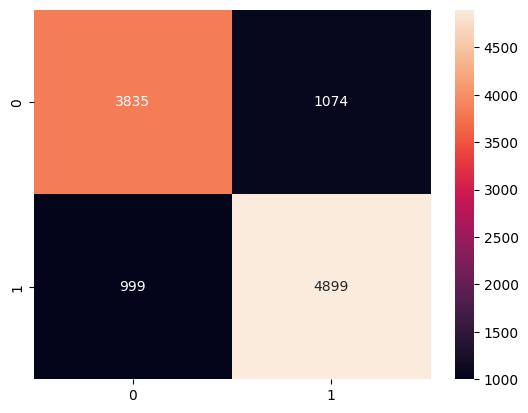

In [45]:
# Predicciones
y_pred = rforest_model.predict(X_test)

# Accuracy
print(f"Accuracy: {rforest_model.score(X_test, y_test)}")

# Precision, Recall, F1-Score
print(classification_report(y_test, y_pred))

# Matriz de confusión
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d')
plt.show()

**Evaluación tercer modelo escogido**: KKN

Accuracy: 0.7163875266031277
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      4909
           1       0.74      0.74      0.74      5898

    accuracy                           0.72     10807
   macro avg       0.71      0.71      0.71     10807
weighted avg       0.72      0.72      0.72     10807



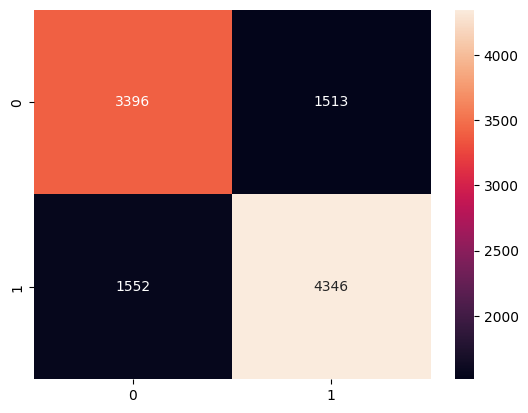

In [ ]:
# Predicciones
y_pred = kkn_model.predict(X_test)

# Accuracy
print(f"Accuracy: {kkn_model.score(X_test, y_test)}")

# Precision, Recall, F1-score
print(classification_report(y_test, y_pred))

# Matriz de confusión
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d')
plt.show()

---


Responde a la siguiente pregunta: ¿Si queremos evitar clasificar mal los hongos venenosos en qué debemos fijarnos? Discute sobre las implicaciones de los errores de tipo 1 y tipo 2 en el contexto de este problema (considera el contexto inicial).

**RESPUESTA**: Dado que un hongo es clasificado como venenoso si la columna `class` es igual a 1, debemos fijarnos en la métrica de `Recall`, ya que esta métrica nos indica la proporción de hongos venenosos (1) que fueron correctamente clasificados como tal. De esta forma, esta es la métrica que nos permitirá evitar clasificar mal los hongos venenosos.

En el contexto de este problema, los errores de tipo 1 y tipo 2 se traducen en los siguientes escenarios:

- Error de tipo 1: Clasificar un hongo como venenoso cuando en realidad es comestible. Para este caso este escenario no supondría una situación de riesgo, ya que se estaría evitando consumir un hongo que en realidad es comestible.

- Error de tipo 2: Clasificar un hongo como comestible cuando en realidad es venenoso. Para este caso este escenario supondría una situación de riesgo, ya que se estaría consumiendo un hongo que en realidad es venenoso.

Por lo que para este caso, es más importante evitar el error de tipo 2, ya que este escenario supondría un riesgo mucho mayor.

---

Por último, basado en lo anterior decide cual de los tres modelos es el que obtiene los mejores resultados para este problema en particular y explica porque este puede haber funcionado mejor en este caso. Para esto habla sobre los aspectos puntuales del algoritmo que pueden haber ayudado.

**RESPUESTA**: Basándonos en las métricas obtenidas, el modelo que obtiene los mejores resultados en cuanto al objetivo de minimizar errores del tipo II, es el modelo de Random Forest, ya que obtiene 999 casos del tipo 2 en contraste a los 1552 y 1877 de los otros modelos.

Esto en particular se explica debido a que el algoritmo de Random Forest es un algoritmo que combina múltiples árboles de decisión, lo que permite mejorar la precisión y evitar el sobreajuste del modelo, de esta forma, al combinar múltiples árboles de decisión, se obtiene un modelo más robusto y con mejor capacidad de generalización, además destaca sobre el modelo de kkn ya que este último es un modelo muchos más simple y suscetible a ruido en los datos no relevante para la clasificación.